In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from treelib import Node, Tree
import random
from graphviz import Source
import pydotplus


In [333]:
from sklearn import datasets

iris = datasets.load_iris()

x= iris.data
y= iris.target


In [334]:
def entropy_cal(y_val):

    _, values = np.unique(y_val, return_counts=True)
    total_val =  np.sum(values)
    probability = values/total_val
        
    entropy = np.sum(- probability* np.log2(probability))

    return entropy, np.sum(values)


In [335]:
def total_entropy(left_truth, right_truth):

   all_values =  np.concatenate((left_truth,right_truth))
   _, values = np.unique(all_values, return_counts=True)
   size = len(all_values)
   probability =  values/size

   entropy = np.sum(- probability* np.log2(probability))

   return entropy, size 
    

In [336]:
def info_gain(total_entropy, left_entropy, right_entropy, l_app, r_app, total_size):
    
    info_gain = total_entropy - (l_app/ total_size)*left_entropy - (r_app/total_size)* right_entropy
    
    return info_gain

In [346]:
def is_unique(values,parent):
    global tree
  
    unique_values, total_count = np.unique(values, return_counts=True)

  
    

    if len(unique_values) ==  1 :
     tree.create_node(unique_values[0],parent=parent)
     
     
     
     
     return True
    return False

In [338]:
def majority_vote(x,y):
    category, votes = np.unique(y,return_counts=True)
    max_votes = np.argmax(votes)
    return category[max_votes]

In [339]:
def data_divider(x,y, divider):

        left_truth= y[x<=divider]
        right_truth = y[x>divider]

        left_data= x[x<=divider]
        right_data = x[x>divider]
    
        
        return left_truth, right_truth, left_data, right_data

In [340]:
def best_divider(x,y):
    unqiue_data = np.unique(x)
    

    unique_values  = np.zeros(len(unqiue_data))
    info_gain_max  = 0
    info_gain_index = 0
    


    for i in range(0, len(unqiue_data)-1):
       
       
        divider = (unqiue_data[i] +unqiue_data[i+1])/2
        unique_values[i] = divider
        left_truth, right_truth, left_data, right_data  = data_divider(x, y,divider)
       
        
        entropy_l, l_app = entropy_cal(left_truth)
        entropy_r, r_app = entropy_cal(right_truth)

        t_entropy, total_size =  total_entropy(left_truth, right_truth)


        gain = info_gain(t_entropy, entropy_l, entropy_r,l_app,r_app, total_size)



        if gain>info_gain_max :
            info_gain_max = gain
            info_gain_index= i


    return unique_values[info_gain_index]



    
    


In [351]:

def Decision_Tree(x,y, node ):
    global tree      


    if is_unique(y,node):
        return True
    
    split_value = best_divider(x,y)

    
    
 
    left_value_y, right_value_y, left_value, right_value = data_divider(x,y,split_value)

    if(len(left_value)<=0 or len(right_value)<=0):
     
            class_majority = majority_vote(x,y)
    
            temp = tree.create_node(class_majority,parent=node)
    
            node = temp
    
    
    else:
    
        temp_two = tree.create_node(split_value,parent=node)
        node =  temp_two

        Decision_Tree(left_value, left_value_y, node)
        
        Decision_Tree(right_value, right_value_y,node)



In [353]:
tree = Tree()

parent = tree.create_node("Root",0)

Decision_Tree(x[:,3],y, parent)


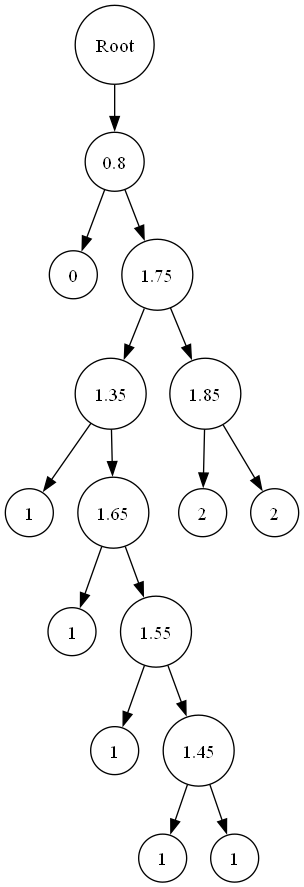

In [354]:

tree.to_graphviz("tree")

pydot_graph = pydotplus.graph_from_dot_file("tree")
from IPython.display import Image

Image(pydot_graph.create_png())


In [287]:
# Lets Test If our implementation is working correly\
# We will be using sklearns Decision Tree and compare the output with ours

In [289]:
# Scikit Learns Library function starts here
# You can remove it if you want

In [356]:
x= x[:,3]
x= x.reshape(-1, 1) 


In [357]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(x,y)

#Predict the response for test dataset
y_pred = clf.predict(x)


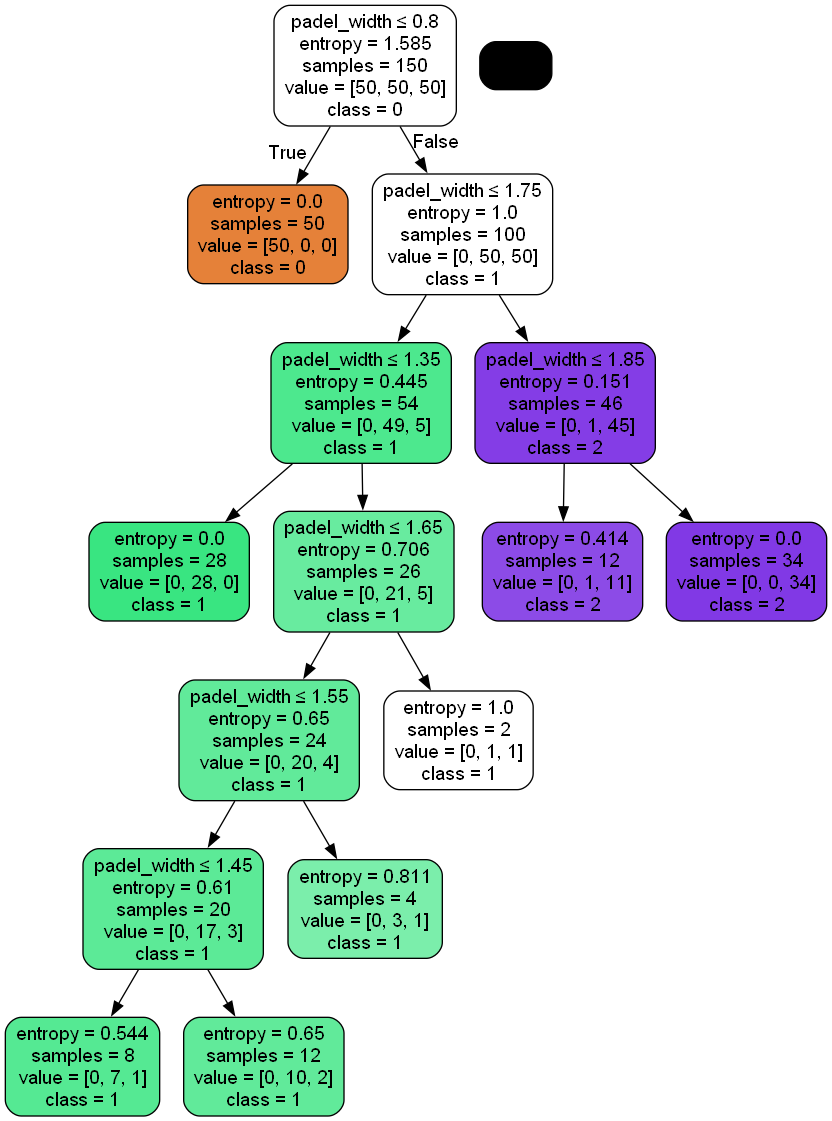

In [359]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ["padel_width"],class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())